In [11]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import functools
import matplotlib.pyplot as plt
import traceback 
import contextlib

In [12]:
bladder_cancer = pd.read_csv('bladder_cancer.csv')

x = pd.DataFrame(bladder_cancer, columns=['Amp_1MHz', 'Phase_1MHz', 'Amp_500kHz', 'Phase_500kHz', 'Amp_100kHz', 'Phase_100kHz', 'Amp_50kHz', 'Phase_50kHz', 'Amp_10kHz', 'Phase_10kHz'])

y = pd.DataFrame(bladder_cancer, columns=['Label'])

x_mean = x.mean()
x_std = x.std()
x = (x-x_mean)/x_std

x_data, x_test, y_data, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=1) 
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)
x_train

array([[-0.70212259,  0.87691791,  1.3089513 , ...,  0.29837007,
         0.38672978,  0.01241453],
       [-2.75649426,  1.09072906, -0.89399574, ...,  0.17062017,
        -0.58008862,  0.68077064],
       [ 0.24532515, -0.38633226, -0.58649158, ...,  0.37028141,
        -1.44227513,  1.10491147],
       ...,
       [-1.18210733, -0.99929518, -1.63580168, ..., -0.66027891,
         1.69482415,  1.15727325],
       [ 1.39072348, -0.85021045, -2.14404835, ...,  0.35723112,
         0.05855178,  0.78050842],
       [ 1.37015955,  0.36935711,  0.63271442, ...,  0.22917919,
        -1.16423879,  0.0284987 ]])

In [13]:
print("훈련 샘플: {}, 레이블: {}".format(len(x_train), len(y_train)))

훈련 샘플: 169, 레이블: 169


In [16]:
model = tf.keras.Sequential([
   
   layers.Dense(16, activation='relu'),
   layers.Dense(40, activation='relu'),
   layers.Dense(1, activation='sigmoid')

])

model.compile(loss= 'binary_crossentropy',
                optimizer = tf.optimizers.Adam(),
                metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_data=(x_val, y_val), verbose=1)

Epoch 1/100
17/17 [==============================] - 1s 8ms/step - loss: 0.6698 - accuracy: 0.5444 - val_loss: 0.6849 - val_accuracy: 0.5814
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.6746 - val_loss: 0.6455 - val_accuracy: 0.6047
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5827 - accuracy: 0.7101 - val_loss: 0.6209 - val_accuracy: 0.6279
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5527 - accuracy: 0.7456 - val_loss: 0.5940 - val_accuracy: 0.7209
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7633 - val_loss: 0.5693 - val_accuracy: 0.7442
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.7870 - val_loss: 0.5468 - val_accuracy: 0.7674
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7929 - val_loss: 0.5280 - val_accuracy: 0.7907
Epoch 8/100
1

In [18]:
model.evaluate(x_train,  y_train, verbose=2)
model.evaluate(x_val,  y_val, verbose=2)
model.evaluate(x_test,  y_test, verbose=2)

6/6 - 0s - loss: 0.0131 - accuracy: 1.0000 - 14ms/epoch - 2ms/step
2/2 - 0s - loss: 0.1439 - accuracy: 0.9535 - 12ms/epoch - 6ms/step
1/1 - 0s - loss: 0.0748 - accuracy: 1.0000 - 12ms/epoch - 12ms/step


[0.07481320947408676, 1.0]

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

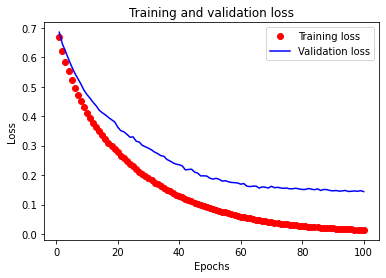

In [20]:


acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'ro', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

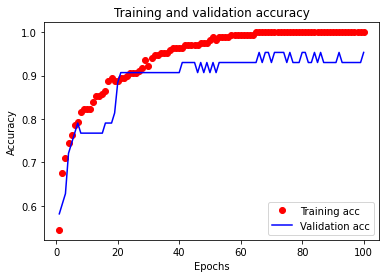

In [21]:
plt.clf()  

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()